# Tasks
Use the dataset available on Moodle and discuss the relationship between the variables for the life expectancy using 
1) Linear Regression

2) Ridge Regression

3) Lasso Regression

4) Regression using Decision Tree and RandomForest

(Online availability of dataset: https://www.kaggle.com/kumarajarshi/life-expectancy-who/)

### Reference: 
Chapter 10,  Predicting Continuous Target Variables with Regression Analysis, Python Machine Learning Second Edition, Sebastian Raschka, Vahid Mirjalili, Copyright © 2017 Packt Publishing.

# 1) Linear Regression

In [1]:
# import pandas data set
import pandas as pd
import numpy as np # linear algebra
import warnings
warnings.filterwarnings('ignore') # We can suppress the warnings
import matplotlib.pyplot as plt
import seaborn as sns
# Set the style for the plot using swaborn library
sns.set(style='whitegrid', context='notebook')
# Load the dataset into dataframe (df) 
df = pd.read_csv("Life_Expectancy_Data.csv")



# Display first 5 records
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [2]:
# Size of the data 
df.shape

(2938, 22)

In [3]:
# A Quick Information about the Data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [4]:
# Checking for Null Values
df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

We are going to drop null values:

In [5]:
df = df.dropna()   

In [6]:
df.isnull().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64

We've reduced the number of rows:

In [7]:
#Passing life expectancy at the end:
cols = df.columns.tolist()
cols = cols[:3] + cols[4:] + [cols[3]]
df = df[cols]

In [8]:
df.shape

(1649, 22)

In [9]:
df.head()

,Country,Year,Status,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Life expectancy
0,Afghanistan,2015,Developing,263.0,62,0.01,71.279624,65.0,1154,19.1,...,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,65.0
1,Afghanistan,2014,Developing,271.0,64,0.01,73.523582,62.0,492,18.6,...,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,59.9
2,Afghanistan,2013,Developing,268.0,66,0.01,73.219243,64.0,430,18.1,...,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,59.9
3,Afghanistan,2012,Developing,272.0,69,0.01,78.184215,67.0,2787,17.6,...,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,59.5
4,Afghanistan,2011,Developing,275.0,71,0.01,7.097109,68.0,3013,17.2,...,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,59.2


In [10]:
df.corr()

,Year,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Life expectancy
Year,1.000000,-0.037092,0.008029,-0.113365,0.069553,0.114897,-0.053822,0.005739,0.010479,-0.016699,0.059493,0.029641,-0.123405,0.096421,0.012567,0.019757,0.014122,0.122892,0.088732,0.050771
Adult Mortality,-0.037092,1.000000,0.042450,-0.175535,-0.237610,-0.105225,-0.003967,-0.351542,0.060365,-0.199853,-0.085227,-0.191429,0.550691,-0.255035,-0.015012,0.272230,0.286723,-0.442203,-0.421171,-0.702523
infant deaths,0.008029,0.042450,1.000000,-0.106217,-0.090765,-0.231769,0.532680,-0.234425,0.996906,-0.156929,-0.146951,-0.161871,0.007712,-0.098092,0.671758,0.463415,0.461908,-0.134754,-0.214372,-0.169074
Alcohol,-0.113365,-0.175535,-0.106217,1.000000,0.417047,0.109889,-0.050110,0.353396,-0.101082,0.240315,0.214885,0.242951,-0.027113,0.443433,-0.028880,-0.403755,-0.386208,0.561074,0.616975,0.402718
percentage expenditure,0.069553,-0.237610,-0.090765,0.417047,1.000000,0.016760,-0.063071,0.242738,-0.092158,0.128626,0.183872,0.134813,-0.095085,0.959299,-0.016792,-0.255035,-0.255635,0.402170,0.422088,0.409631
Hepatitis B,0.114897,-0.105225,-0.231769,0.109889,0.016760,1.000000,-0.124800,0.143302,-0.240766,0.463331,0.113327,0.588990,-0.094802,0.041850,-0.129723,-0.129406,-0.133251,0.184921,0.215182,0.199935
Measles,-0.053822,-0.003967,0.532680,-0.050110,-0.063071,-0.124800,1.000000,-0.153245,0.517506,-0.057850,-0.113583,-0.058606,-0.003522,-0.064768,0.321946,0.180642,0.174946,-0.058277,-0.115660,-0.068881
BMI,0.005739,-0.351542,-0.234425,0.353396,0.242738,0.143302,-0.153245,1.000000,-0.242137,0.186268,0.189469,0.176295,-0.210897,0.266114,-0.081416,-0.547018,-0.554094,0.510505,0.554844,0.542042
under-five deaths,0.010479,0.060365,0.996906,-0.101082,-0.092158,-0.240766,0.517506,-0.242137,1.000000,-0.171164,-0.145803,-0.178448,0.019476,-0.100331,0.658680,0.464785,0.462289,-0.148097,-0.226013,-0.192265
Polio,-0.016699,-0.199853,-0.156929,0.240315,0.128626,0.463331,-0.057850,0.186268,-0.171164,1.000000,0.119768,0.609245,-0.107885,0.156809,-0.045387,-0.164070,-0.174489,0.314682,0.350147,0.327294


Looking at heatmap, there is a good relationship (correlation exists) between the best 'GDP' and 'percentage expenditure' in the Life Expectation data.

<AxesSubplot:>

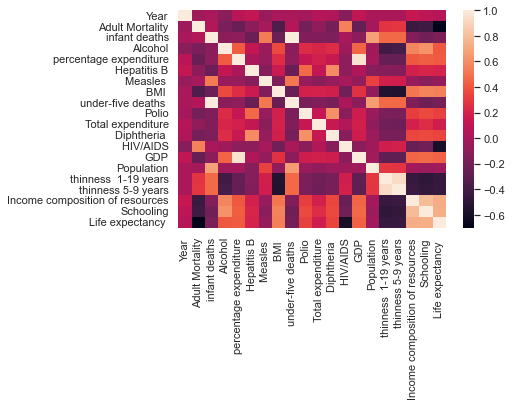

In [11]:
import seaborn as sns
# plot the heatmap
corr = df.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

Here it is better to establish a linear model between 'GDP' and 'percentage expenditure'.
Let's see what our spending percentages are compared to the "GDP" increase. Let's create and fit our linear model.

In [12]:
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()
x = df.GDP.values.reshape(-1,1)
y = df['percentage expenditure'].values.reshape(-1,1)          

linear_reg.fit(x,y)

LinearRegression()

y = b0 + b1*x is our linear regression model.
Let's see estimated percentage of expenditure in GDP 10 thousand:

In [13]:
b0 = linear_reg.predict(([[10000]]))       
print("b0: ", b0)

b1 = linear_reg.coef_
print("b1: ", b1)

b0:  [[1351.02549826]]
b1:  [[0.14705833]]


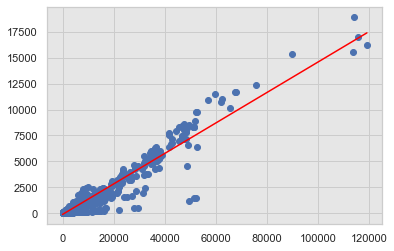

Mean Absolute Error:  50943.94783778521
Mean Squared Error:  3456291221.6604424
Root Mean Squared Error:  58790.23066514063


In [14]:

import matplotlib.pyplot as plt
x_array = np.arange(min(df.GDP),max(df.GDP)).reshape(-1,1)  # this for information about the line to be predicted

plt.scatter(x,y)
y_head = linear_reg.predict(x_array)                                 # this is predict percentage of expenditure
plt.plot(x_array,y_head,color="red")
ax = plt.gca()
ax.set_facecolor('#e6e6e6')  # Change the background color to light gray
plt.show()


from sklearn import metrics
print("Mean Absolute Error: ", metrics.mean_absolute_error(x_array,y_head))
print("Mean Squared Error: ", metrics.mean_squared_error(x_array,y_head))
print("Root Mean Squared Error: ", np.sqrt(metrics.mean_squared_error(x_array, y_head)))

In [15]:
from sklearn.metrics import mean_squared_error, r2_score 
print(r2_score(y, linear_reg.predict(x)))

0.920254296978608


The conclusion here is: the estimate made has 92% accuracy

# 2) Ridge Regression

In [16]:
df

,Country,Year,Status,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Life expectancy
0,Afghanistan,2015,Developing,263.0,62,0.01,71.279624,65.0,1154,19.1,...,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,65.0
1,Afghanistan,2014,Developing,271.0,64,0.01,73.523582,62.0,492,18.6,...,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,59.9
2,Afghanistan,2013,Developing,268.0,66,0.01,73.219243,64.0,430,18.1,...,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,59.9
3,Afghanistan,2012,Developing,272.0,69,0.01,78.184215,67.0,2787,17.6,...,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,59.5
4,Afghanistan,2011,Developing,275.0,71,0.01,7.097109,68.0,3013,17.2,...,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,59.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,723.0,27,4.36,0.000000,68.0,31,27.1,...,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2,44.3
2934,Zimbabwe,2003,Developing,715.0,26,4.06,0.000000,7.0,998,26.7,...,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5,44.5
2935,Zimbabwe,2002,Developing,73.0,25,4.43,0.000000,73.0,304,26.3,...,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0,44.8
2936,Zimbabwe,2001,Developing,686.0,25,1.72,0.000000,76.0,529,25.9,...,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8,45.3


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1649 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          1649 non-null   object 
 1   Year                             1649 non-null   int64  
 2   Status                           1649 non-null   object 
 3   Adult Mortality                  1649 non-null   float64
 4   infant deaths                    1649 non-null   int64  
 5   Alcohol                          1649 non-null   float64
 6   percentage expenditure           1649 non-null   float64
 7   Hepatitis B                      1649 non-null   float64
 8   Measles                          1649 non-null   int64  
 9    BMI                             1649 non-null   float64
 10  under-five deaths                1649 non-null   int64  
 11  Polio                            1649 non-null   float64
 12  Total expenditure   

In [18]:
from sklearn.preprocessing import LabelEncoder

# Assume df is your pandas DataFrame and obj_cols are the object columns
obj_cols = ['Country', 'Status']

# Create a label encoder object
label_encoder = LabelEncoder()

# Encode each of the object columns
for col in obj_cols:
    df[col] = label_encoder.fit_transform(df[col])

# Now your object columns are encoded to int64 or float64
print(df.dtypes)

Country                              int32
Year                                 int64
Status                               int32
Adult Mortality                    float64
infant deaths                        int64
Alcohol                            float64
percentage expenditure             float64
Hepatitis B                        float64
Measles                              int64
 BMI                               float64
under-five deaths                    int64
Polio                              float64
Total expenditure                  float64
Diphtheria                         float64
 HIV/AIDS                          float64
GDP                                float64
Population                         float64
 thinness  1-19 years              float64
 thinness 5-9 years                float64
Income composition of resources    float64
Schooling                          float64
Life expectancy                    float64
dtype: object


In [19]:
df

,Country,Year,Status,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Life expectancy
0,0,2015,1,263.0,62,0.01,71.279624,65.0,1154,19.1,...,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,65.0
1,0,2014,1,271.0,64,0.01,73.523582,62.0,492,18.6,...,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,59.9
2,0,2013,1,268.0,66,0.01,73.219243,64.0,430,18.1,...,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,59.9
3,0,2012,1,272.0,69,0.01,78.184215,67.0,2787,17.6,...,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,59.5
4,0,2011,1,275.0,71,0.01,7.097109,68.0,3013,17.2,...,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,59.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,132,2004,1,723.0,27,4.36,0.000000,68.0,31,27.1,...,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2,44.3
2934,132,2003,1,715.0,26,4.06,0.000000,7.0,998,26.7,...,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5,44.5
2935,132,2002,1,73.0,25,4.43,0.000000,73.0,304,26.3,...,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0,44.8
2936,132,2001,1,686.0,25,1.72,0.000000,76.0,529,25.9,...,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8,45.3


In [20]:
# import train_test_split from the library sklearn
from sklearn.model_selection import train_test_split

# Declare a variable named as 'X' and 'y'
X = df.iloc[:, :-1].values               # All features (independent varaibles) except MEDV 
y = df['Life expectancy '].values                    # Target variable

# Split the data into 70% and 30% by using a parameter test_size = 30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# Display the size of the rows and columns
X.shape, y.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1649, 21), (1649,), (1154, 21), (495, 21), (1154,), (495,))

In [21]:
from sklearn.linear_model import Ridge

# Train the Ridge() mode by calling a fit() method
ridge = Ridge().fit(X_train, y_train)

# Display the score by using ridge object
print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test, y_test)))

Training set score: 0.83
Test set score: 0.84


In [22]:
# alpha = 10 is a parameter using a fit() method
ridge10 = Ridge(alpha = 10).fit(X_train, y_train)

# Display the score values for Ridge function
print("Training set score: {:.2f}".format(ridge10.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge10.score(X_test, y_test)))

Training set score: 0.83
Test set score: 0.84


Conclusion:

Training set score that indicates how well the Ridge regression model fits the training data. We are getting 83% for this model that implies the model can explain 83% of its variance.

The test score represents the performance of the Ridge regression model on data that it has not seen before(test data).  A test set score of 0.84 means that the model can explain 84% of the variance in the test data. This score helps assess how well the model generalizes to unseen data.

In this case, since the test set score is close to the training set score, it suggests that the model is performing consistently on both the training and test data, indicating that it has good predictive power and is not overfitting or underfitting.

# 3) Lasso Regression

In [23]:

from sklearn.linear_model import Lasso
lasso = Lasso().fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso.coef_ != 0)))

Training set score: 0.81
Test set score: 0.81
Number of features used: 14


In [24]:
# we increase the default setting of "max_iter",
# otherwise the model would warn us that we should increase max_iter.
lasso001 = Lasso(alpha=0.01).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso001.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso001.coef_ != 0)))

Training set score: 0.83
Test set score: 0.84
Number of features used: 21


In Lasso regression, the training set score and test set score indicate the performance of the model on the training data and test data, respectively, similar to Ridge regression.

Training set score: A score of 0.81 implies that the Lasso regression model explains 81% of the variance in the training data. This means that the model captures 81% of the underlying patterns in the training data.

Test set score: A score of 0.81 suggests that the Lasso regression model can explain 81% of the variance in the test data. This means the model generalizes well to new, unseen data.

Additionally, the "Number of features used: 14" signifies that out of all the available features, the Lasso regression model selected 14 features that it deemed important for making predictions. Lasso regression has the property of feature selection, where it can shrink the coefficients of less important features to zero, effectively removing them from the model. This can help with interpreting the model and improving its generalizability.

# 4) Regression using Decision Tree and Random Forest

4.1 Decision Tree

In [25]:
# Method or Function for Linear Regression plot
def lin_regplot(X, y, model):
    plt.scatter(X, y, c = 'blue')
    plt.plot(X, model.predict(X), color = 'red', linewidth = 2)    
    return

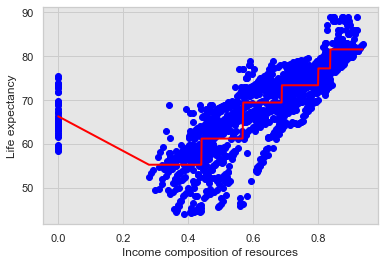

In [26]:
# import DecisionTreeRegressor from the sklearn library
from sklearn.tree import DecisionTreeRegressor

# Store the feature or attribute values in X and y
X = df[['Income composition of resources']].values
y = df['Life expectancy '].values

# Initialise an object by calling a method DecisionTreeRegressor()
tree = DecisionTreeRegressor(max_depth = 3)
tree.fit(X, y)

# Return a copy of the array collapsed into one dimension.
sort_idx = X.flatten().argsort()
ax = plt.gca()
ax.set_facecolor('#e6e6e6')  # Change the background color to light gray
lin_regplot(X[sort_idx], y[sort_idx], tree)
plt.xlabel('Income composition of resources')
plt.ylabel('Life expectancy')
# plt.savefig('./figures/tree_regression.png', dpi = 300)
plt.show()

4.2 Random Forest regression

In [27]:
# Declaration of Varaibles
X = df.iloc[:, :-1].values          # Store all columns into an array (X) except last column, 'MEDV'
y = df['Life expectancy '].values               # Store last column into an array (y)

# Use train_test_split method to split the data into 40% and 60%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 1)

In [28]:
# import RandomForestRegressor from sklearn
from sklearn.ensemble import RandomForestRegressor

# Create an object forest by calling a method RandomForestRegressor()
forest = RandomForestRegressor(n_estimators = 1000, 
                               criterion='squared_error',  # Change 'mse' to 'squared_error'
                               random_state = 1, 
                               n_jobs = -1)

# Train the Model by calling a fit() method
forest.fit(X_train, y_train)

y_train_pred = forest.predict(X_train)
y_test_pred = forest.predict(X_test)

# Display the r2 score values
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred), r2_score(y_test, y_test_pred)))

R^2 train: 0.992, test: 0.959


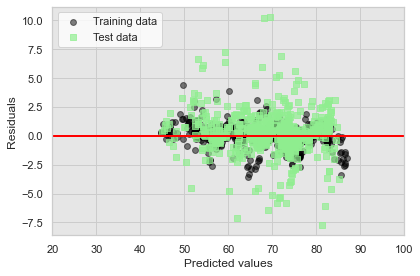

In [32]:
# Draw a scatter plot
plt.scatter(y_train_pred,  
            y_train_pred - y_train, 
            c = 'black', 
            marker = 'o', 
            s = 35,
            alpha = 0.5,
            label = 'Training data')
plt.scatter(y_test_pred,  
            y_test_pred - y_test, 
            c = 'lightgreen', 
            marker = 's', 
            s = 35,
            alpha = 0.7,
            label = 'Test data')

plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc = 'upper left')
plt.hlines(y = 0, xmin = 20, xmax = 100, lw = 2, color = 'red')
plt.xlim([20, 100])
ax = plt.gca()
ax.set_facecolor('#e6e6e6')  # Change the background color to light gray
plt.tight_layout()

# plt.savefig('./figures/slr_residuals.png', dpi=300)
plt.show()

Conclusion:

An R^2 of 0.992 for the training set suggests that the independent variables in the model can explain 99.2% of the variance in the dependent variable, which means that the model fits the training data very well.

An R^2 of 0.959 for the test set indicates that the model explains 95.9% of the variance in the test set, which suggests that the model generalizes well to new, unseen data.

The fact that the test set R^2 is slightly lower than the training set R^2 suggests that there might be some overfitting, but the model seems to perform very well overall.

All in all we can state that Random Forest Regression model is a good fit for dataset "Life_Expectancy_Data.csv", and it can predict quite accurately.

